In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Builiding prediction model


predict customer who will have difficulties paying and not

In [3]:
application = pd.read_csv('application_train.csv')
pd.set_option('display.max_columns', None)
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Select only wanted columns
application = application[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
                          'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                          'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                          'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                          'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
application

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786


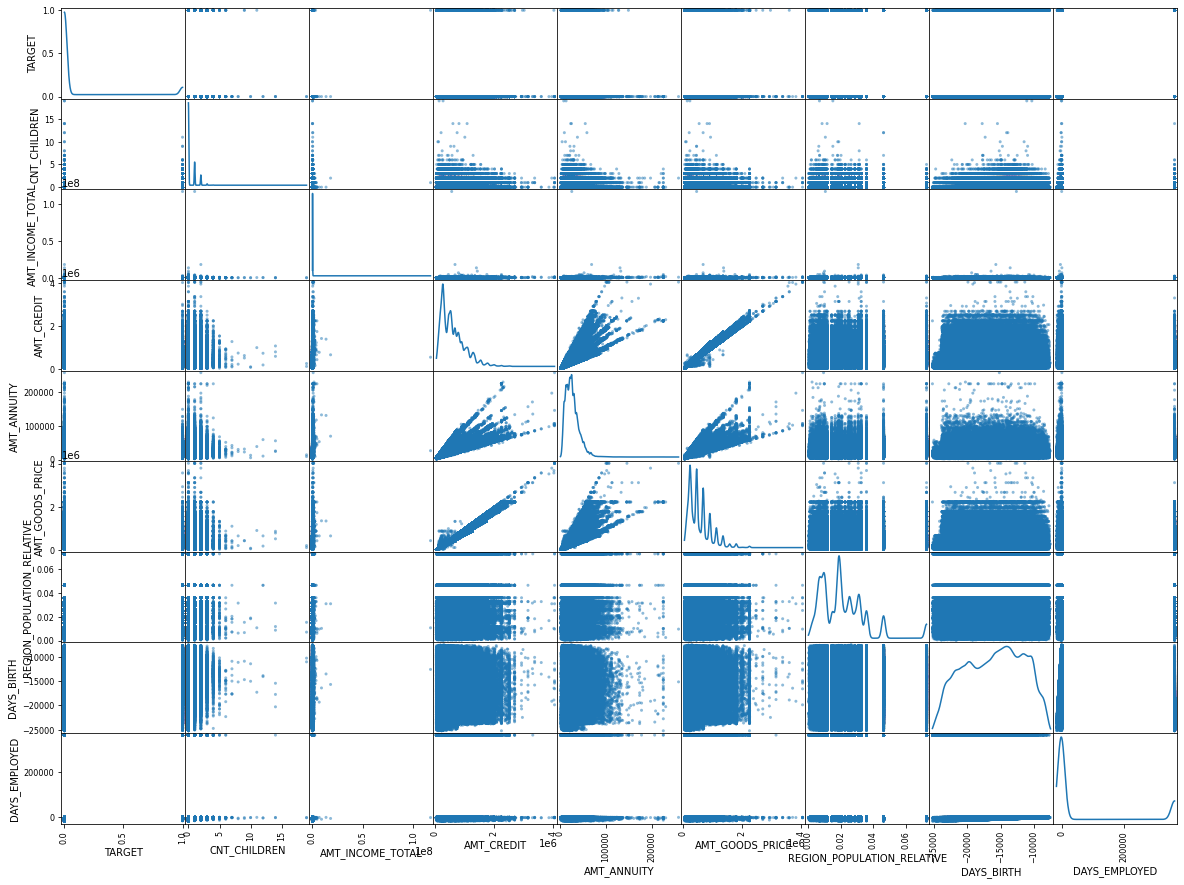

In [5]:
pd.plotting.scatter_matrix(application.loc[:, "TARGET":"DAYS_EMPLOYED"], diagonal="kde",figsize=(20,15))
plt.show()

Amount of credit and amount goods price show a positive correlation. 
Amount of goods price and amount of annuity also show a moderate positive correlation.

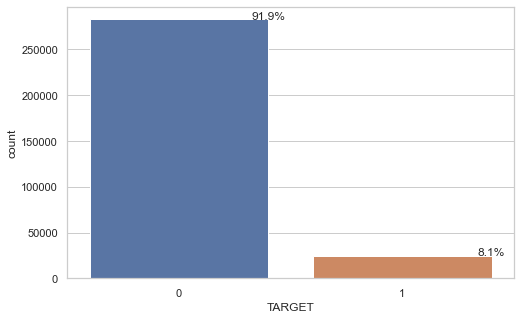

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(application["TARGET"]))
ax = sns.countplot(x="TARGET", data=application)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [35]:
# description of application table 
listItem = []
for col in application.columns :
    listItem.append([col, application[col].dtype, application[col].isna().sum(), round((application[col].isna().sum()/len(application[col])) * 100,2),
                   application[col].nunique(), list(application[col].drop_duplicates().values)])

desc_application = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
desc_application

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,TARGET,int64,0,0.00,2,"[1, 0]"
1,NAME_CONTRACT_TYPE,object,0,0.00,2,"[Cash loans, Revolving loans]"
2,CODE_GENDER,object,0,0.00,3,"[M, F, XNA]"
3,FLAG_OWN_CAR,object,0,0.00,2,"[N, Y]"
4,FLAG_OWN_REALTY,object,0,0.00,2,"[Y, N]"
5,CNT_CHILDREN,int64,0,0.00,15,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
6,AMT_INCOME_TOTAL,float64,0,0.00,2548,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
7,AMT_CREDIT,float64,0,0.00,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
8,AMT_ANNUITY,float64,12,0.00,13672,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2..."
9,AMT_GOODS_PRICE,float64,278,0.09,1002,"[351000.0, 1129500.0, 135000.0, 297000.0, 5130..."


In [36]:
# days into age
application[['DAYS_BIRTH','DAYS_EMPLOYED']] = application[['DAYS_BIRTH','DAYS_EMPLOYED']].abs()

def day_to_year(x):
    return round(x/365)

application[['DAYS_BIRTH','DAYS_EMPLOYED']] = application[['DAYS_BIRTH','DAYS_EMPLOYED']].apply(day_to_year)
application = application.rename({'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, axis='columns')
application

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,26.0,1.0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,57.0,1001.0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,41.0,22.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,33.0,13.0


<AxesSubplot:xlabel='AGE'>

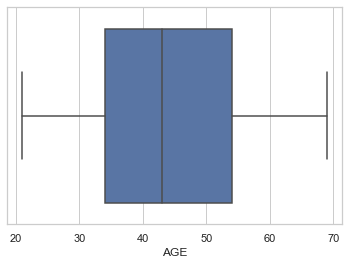

In [37]:
sns.boxplot(data=application, x="AGE")
# no outliers in the age column

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

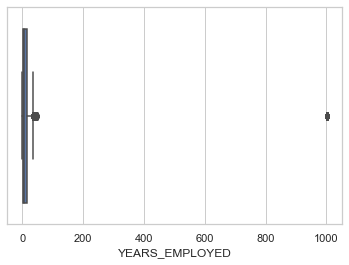

In [38]:
sns.boxplot(data=application, x="YEARS_EMPLOYED")
# there are two outliers in the YEARS_EMPLOYED column

In [39]:
# replace outliers with IQR

def IQR(x):
    IQR = np.diff(x.quantile([0.25,0.75]))[0]
    S = 1.5*IQR
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    x[x < Q1 - S] = Q1 - S
    x[x > Q3 + S] = Q1 + S
    return x

application['YEARS_EMPLOYED']= application[['YEARS_EMPLOYED']].apply(IQR)
application

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,26.0,1.0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,57.0,22.5
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,41.0,22.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,33.0,13.0


<AxesSubplot:xlabel='YEARS_EMPLOYED'>

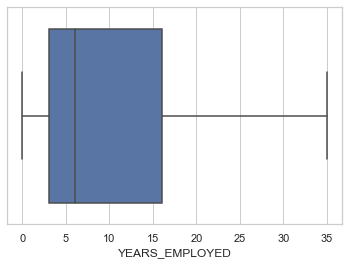

In [40]:
sns.boxplot(data=application, x="YEARS_EMPLOYED")

In [41]:
# replace categorical feature with numerical 
mapping = {"NAME_CONTRACT_TYPE" : {"Cash loans":0, "Revolving loans":1},
           "CODE_GENDER":{"M":0, "F":1,'XNA':2},
          "FLAG_OWN_CAR": {'Y':0,'N':1},
          "FLAG_OWN_REALTY": {'Y':0,'N':1},
          "NAME_TYPE_SUITE": {'Unaccompanied':0,'Family':1,'Spouse, partner':2,
                              'Children':3,'Other_B':4,'Other_A':5,'Group of people':6},
           "NAME_INCOME_TYPE": {'Working':0,'Commercial associate':1,'Pensioner':2,
                              'State servant':3,'Unemployed':4,'Student':5,'Businessman':6,'Maternity leave':7},
          "NAME_EDUCATION_TYPE": {'Secondary / secondary special':0,'Higher education':1,
                                 'Incomplete higher':2,'Lower secondary':3,'Academic degree':4},
          "NAME_FAMILY_STATUS": {'Married':0,'Single / not married':1,
                                 'Civil marriage':2,'Separated':3,'Widow':4,'Unknown':5},
          "NAME_HOUSING_TYPE": {'House / apartment':0,'With parents':1,'Municipal apartment':2,
                              'Rented apartment':3,'Office apartment':4,'Co-op apartment':5}}
application.replace(mapping, inplace=True)
application

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED
0,1,0,0,1,0,0,202500.0,406597.5,24700.5,351000.0,0.0,0,0,1,0,0.018801,26.0,2.0
1,0,0,1,1,1,0,270000.0,1293502.5,35698.5,1129500.0,1.0,3,1,0,0,0.003541,46.0,3.0
2,0,1,0,0,0,0,67500.0,135000.0,6750.0,135000.0,0.0,0,0,1,0,0.010032,52.0,1.0
3,0,0,1,1,0,0,135000.0,312682.5,29686.5,297000.0,0.0,0,0,2,0,0.008019,52.0,8.0
4,0,0,0,1,0,0,121500.0,513000.0,21865.5,513000.0,0.0,0,0,1,0,0.028663,55.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,1,1,0,157500.0,254700.0,27558.0,225000.0,0.0,0,0,3,1,0.032561,26.0,1.0
307507,0,0,1,1,0,0,72000.0,269550.0,12001.5,225000.0,0.0,2,0,4,0,0.025164,57.0,22.5
307508,0,0,1,1,0,0,153000.0,677664.0,29979.0,585000.0,0.0,0,1,3,0,0.005002,41.0,22.0
307509,1,0,1,1,0,0,171000.0,370107.0,20205.0,319500.0,0.0,1,0,0,0,0.005313,33.0,13.0


In [42]:
listItem = []
for col in application.columns :
    listItem.append([col, application[col].dtype, application[col].isna().sum(), round((application[col].isna().sum()/len(application[col])) * 100,2),
                   application[col].nunique(), list(application[col].drop_duplicates().values)])

desc_application = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
desc_application

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,TARGET,int64,0,0.00,2,"[1, 0]"
1,NAME_CONTRACT_TYPE,int64,0,0.00,2,"[0, 1]"
2,CODE_GENDER,int64,0,0.00,3,"[0, 1, 2]"
3,FLAG_OWN_CAR,int64,0,0.00,2,"[1, 0]"
4,FLAG_OWN_REALTY,int64,0,0.00,2,"[0, 1]"
5,CNT_CHILDREN,int64,0,0.00,15,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
6,AMT_INCOME_TOTAL,float64,0,0.00,2548,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
7,AMT_CREDIT,float64,0,0.00,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
8,AMT_ANNUITY,float64,12,0.00,13672,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2..."
9,AMT_GOODS_PRICE,float64,278,0.09,1002,"[351000.0, 1129500.0, 135000.0, 297000.0, 5130..."


In [43]:
# removing null items as it doesn't take a lot of data out
application = application.dropna()

In [44]:
# Feature scailing
application.AMT_INCOME_TOTAL = (application.AMT_INCOME_TOTAL-min(application.AMT_INCOME_TOTAL))/(max(application.AMT_INCOME_TOTAL)-min(application.AMT_INCOME_TOTAL))
application.AMT_CREDIT = (application.AMT_CREDIT-min(application.AMT_CREDIT))/(max(application.AMT_CREDIT)-min(application.AMT_CREDIT))
application.AMT_ANNUITY = (application.AMT_ANNUITY-min(application.AMT_ANNUITY))/(max(application.AMT_ANNUITY)-min(application.AMT_ANNUITY))
application.AMT_GOODS_PRICE = (application.AMT_GOODS_PRICE-min(application.AMT_GOODS_PRICE))/(max(application.AMT_GOODS_PRICE)-min(application.AMT_GOODS_PRICE))
application.AGE = (application.AGE-min(application.AGE))/(max(application.AGE)-min(application.AGE))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    application.drop(['TARGET'], axis=1),
    application.TARGET,
    test_size= 0.2,
    random_state=0,
    stratify=application.TARGET
)

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9191567878253486

# Preparing test dataset

In [47]:
application_test_all = pd.read_csv("application_test.csv")
application_test_all.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [48]:
# Show wanted columns
application_test = application_test_all[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                          'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                          'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                          'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                          'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191


In [49]:
# days into age
application_test[['DAYS_BIRTH','DAYS_EMPLOYED']] = application_test[['DAYS_BIRTH','DAYS_EMPLOYED']].abs()

def day_to_year(x):
    return round(x/365)

application_test[['DAYS_BIRTH','DAYS_EMPLOYED']] = application_test[['DAYS_BIRTH','DAYS_EMPLOYED']].apply(day_to_year)
application_test = application_test.rename({'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, axis='columns')
application_test

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,53.0,6.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49.0,12.0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,55.0,12.0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,38.0,5.0
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,36.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,55.0,14.0
48740,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,31.0,3.0
48741,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,44.0,8.0
48742,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,38.0,7.0


In [50]:
# Categorical into numeric
mapping = {"NAME_CONTRACT_TYPE" : {"Cash loans":0, "Revolving loans":1},
           "CODE_GENDER":{"M":0, "F":1,'XNA':2},
          "FLAG_OWN_CAR": {'Y':0,'N':1},
          "FLAG_OWN_REALTY": {'Y':0,'N':1},
          "NAME_TYPE_SUITE": {'Unaccompanied':0,'Family':1,'Spouse, partner':2,
                              'Children':3,'Other_B':4,'Other_A':5,'Group of people':6},
           "NAME_INCOME_TYPE": {'Working':0,'Commercial associate':1,'Pensioner':2,
                              'State servant':3,'Unemployed':4,'Student':5,'Businessman':6,'Maternity leave':7},
          "NAME_EDUCATION_TYPE": {'Secondary / secondary special':0,'Higher education':1,
                                 'Incomplete higher':2,'Lower secondary':3,'Academic degree':4},
          "NAME_FAMILY_STATUS": {'Married':0,'Single / not married':1,
                                 'Civil marriage':2,'Separated':3,'Widow':4,'Unknown':5},
          "NAME_HOUSING_TYPE": {'House / apartment':0,'With parents':1,'Municipal apartment':2,
                              'Rented apartment':3,'Office apartment':4,'Co-op apartment':5}}
application_test.replace(mapping, inplace=True)
application_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED
0,0,1,1,0,0,135000.0,568800.0,20560.5,450000.0,0.0,0,1,0,0,0.018850,53.0,6.0
1,0,0,1,0,0,99000.0,222768.0,17370.0,180000.0,0.0,0,0,0,0,0.035792,49.0,12.0
2,0,0,0,0,0,202500.0,663264.0,69777.0,630000.0,NaN,0,1,0,0,0.019101,55.0,12.0
3,0,1,1,0,2,315000.0,1575000.0,49018.5,1575000.0,0.0,0,0,0,0,0.026392,38.0,5.0
4,0,0,0,1,1,180000.0,625500.0,32067.0,625500.0,0.0,0,0,0,0,0.010032,36.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,1,1,0,0,121500.0,412560.0,17473.5,270000.0,0.0,0,0,4,0,0.002042,55.0,14.0
48740,0,1,1,1,2,157500.0,622413.0,31909.5,495000.0,0.0,1,0,0,0,0.035792,31.0,3.0
48741,0,1,0,0,1,202500.0,315000.0,33205.5,315000.0,0.0,1,0,0,0,0.026392,44.0,8.0
48742,0,0,1,1,0,225000.0,450000.0,25128.0,450000.0,1.0,1,1,0,0,0.018850,38.0,7.0


In [51]:
# checking null value
application_test.isnull().sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    24
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE               911
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
AGE                             0
YEARS_EMPLOYED                  0
dtype: int64

In [52]:
# replace null value with median 
application_test['AMT_ANNUITY']=application_test['AMT_ANNUITY'].fillna(application_test['AMT_ANNUITY'].median())
application_test['NAME_TYPE_SUITE']=application_test['NAME_TYPE_SUITE'].fillna(application_test['NAME_TYPE_SUITE'].median())                                       

In [53]:
application_test.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
AGE                           0
YEARS_EMPLOYED                0
dtype: int64

In [54]:
# Feature scailing
application_test.AMT_INCOME_TOTAL = (application_test.AMT_INCOME_TOTAL-min(application_test.AMT_INCOME_TOTAL))/(max(application_test.AMT_INCOME_TOTAL)-min(application_test.AMT_INCOME_TOTAL))
application_test.AMT_CREDIT = (application_test.AMT_CREDIT-min(application_test.AMT_CREDIT))/(max(application_test.AMT_CREDIT)-min(application_test.AMT_CREDIT))
application_test.AMT_ANNUITY = (application_test.AMT_ANNUITY-min(application_test.AMT_ANNUITY))/(max(application_test.AMT_ANNUITY)-min(application_test.AMT_ANNUITY))
application_test.AMT_GOODS_PRICE = (application_test.AMT_GOODS_PRICE-min(application_test.AMT_GOODS_PRICE))/(max(application_test.AMT_GOODS_PRICE)-min(application_test.AMT_GOODS_PRICE))
application_test.AGE = (application_test.AGE-min(application_test.AGE))/(max(application_test.AGE)-min(application_test.AGE))

# Prediction

In [55]:
pred = clf.predict(application_test)

In [56]:
submission = pd.DataFrame({
        "SK_ID_CURR": application_test_all["SK_ID_CURR"],
        "TARGET": pred
    })
submission.to_csv('submission.csv', index=False)

In [57]:
pred_df = pd.read_csv('submission.csv')

<AxesSubplot:xlabel='TARGET', ylabel='count'>

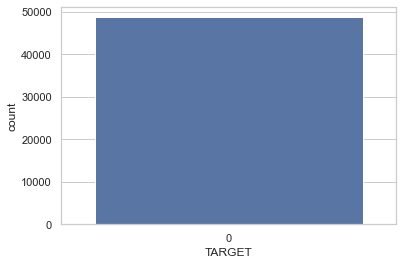

In [58]:
sns.countplot(x='TARGET', data=pred_df)

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
scores = cross_val_score(
     clf, application.drop(['TARGET'], axis=1), application['TARGET'], cv=5, scoring='accuracy')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [61]:
np.mean(scores)

0.9191559957754587